In [6]:
import pickle

from sklearn.metrics import ConfusionMatrixDisplay

from matplotlib import pyplot as plt
from matplotlib import rc

rc("font", **{"family": "Times"})
rc("text", usetex=True)

plt.rcParams['figure.dpi']= 300

with open("preds_raw.pkl", "rb") as file:
    predictions = pickle.load(file)

with open("preds_max.pkl", "rb") as file:
    predictions_max = pickle.load(file)

labels = [
    "Blues",
    "Classical",
    "Country",
    "Disco",
    "Hip-Hop",
    "Jazz",
    "Metal",
    "Pop",
    "Reggae",
    "Rock"
]

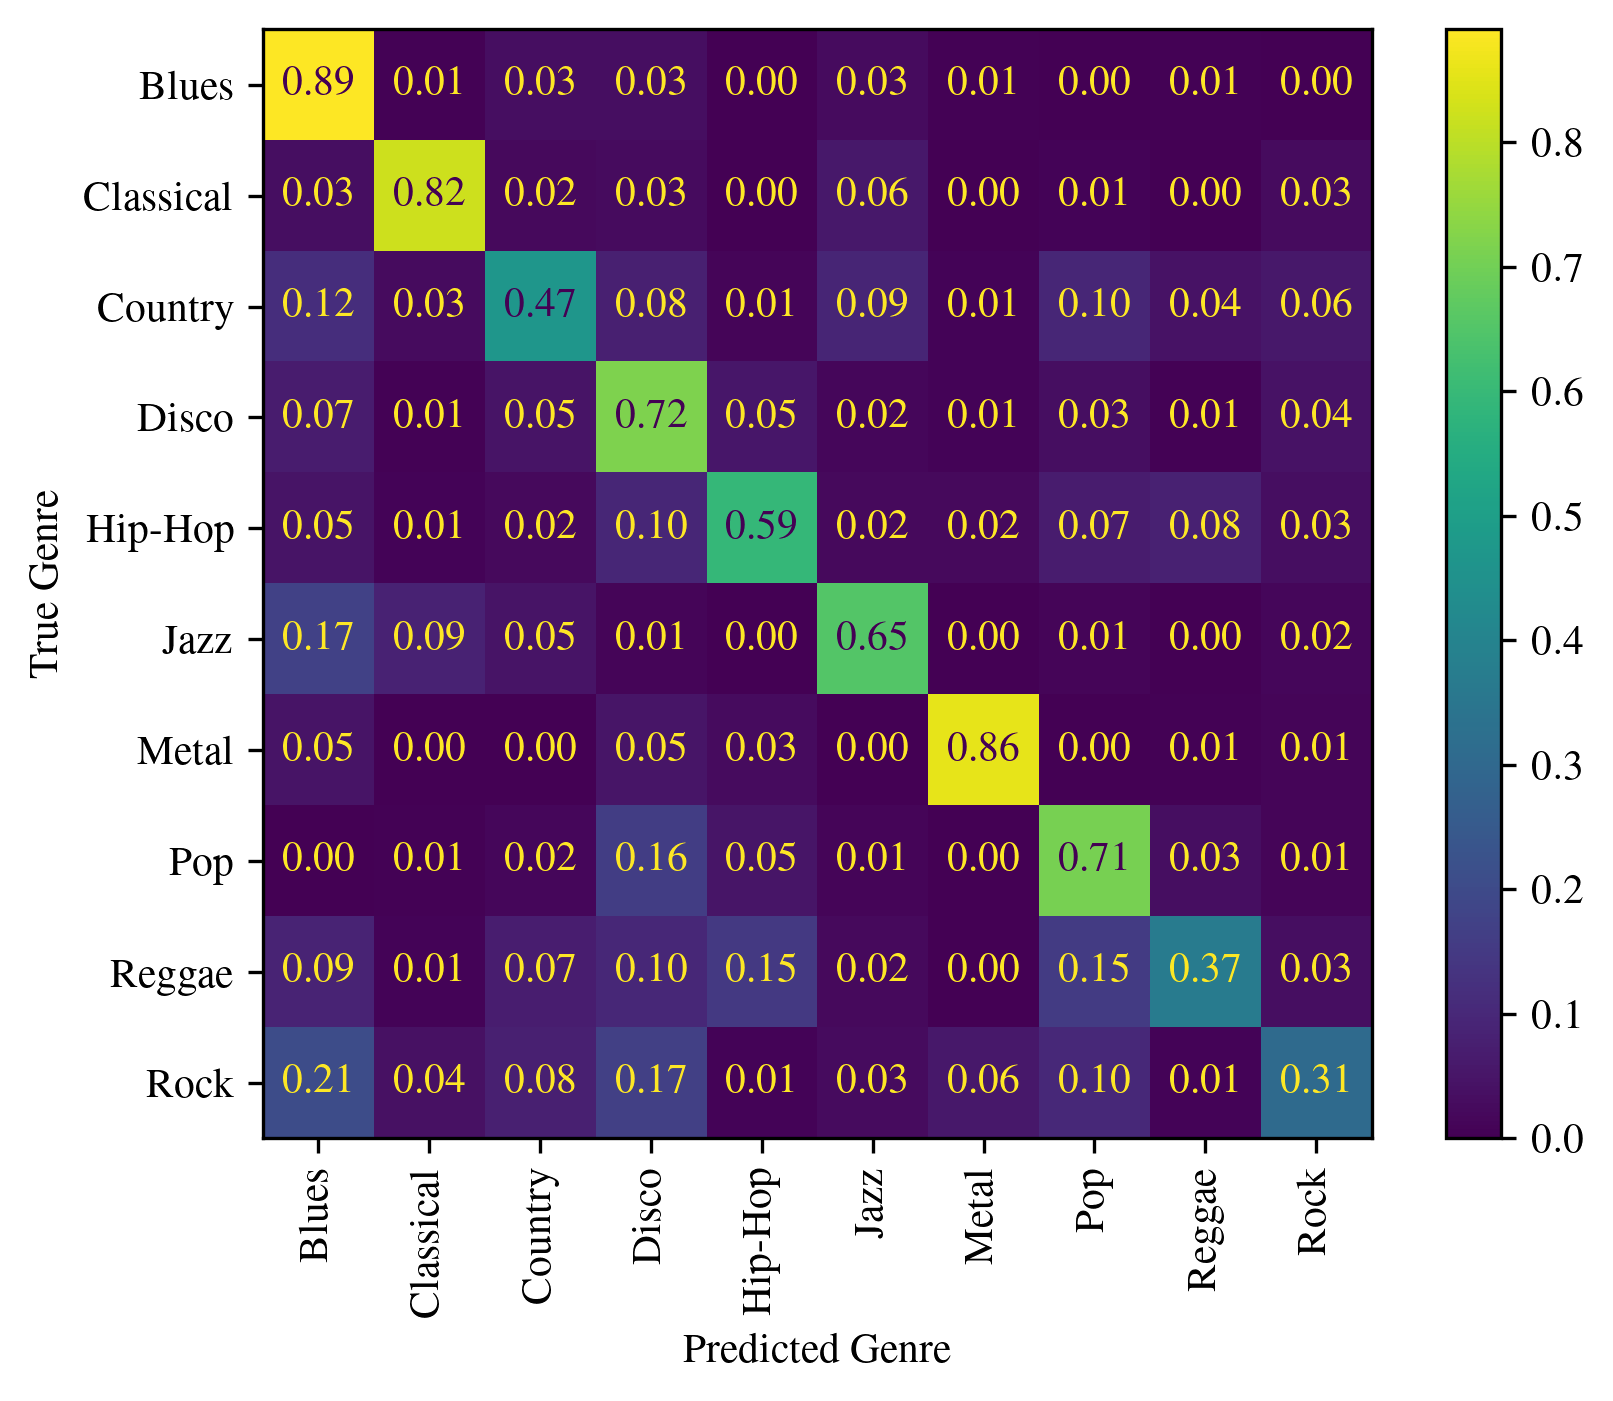

In [7]:
x = ConfusionMatrixDisplay.from_predictions(
    predictions[0],
    predictions[1],
    display_labels=labels,
    xticks_rotation="vertical",
    normalize="true",
    values_format=".2f"
)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.savefig("../report/images/cm.png", bbox_inches='tight', pad_inches=0.0)
plt.show()


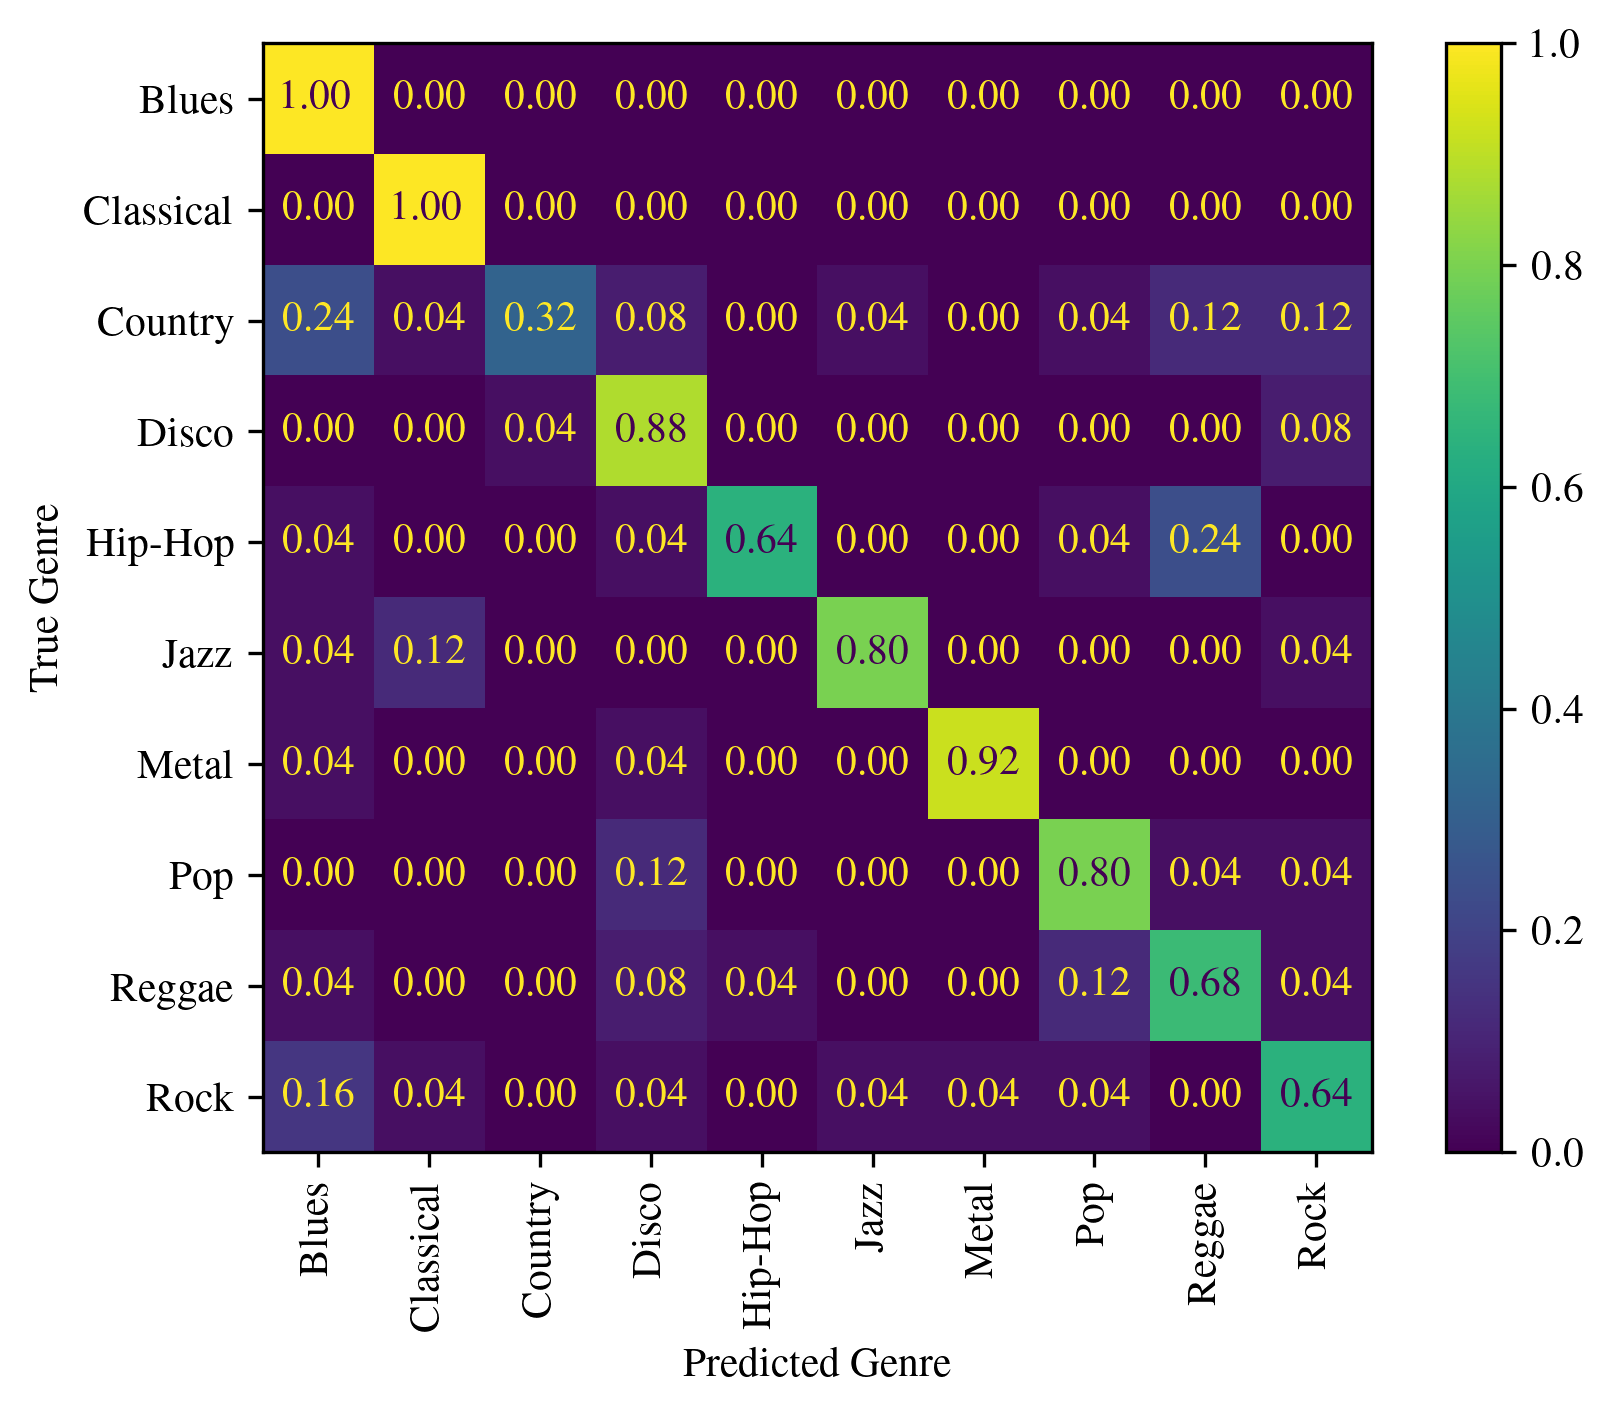

In [8]:
x = ConfusionMatrixDisplay.from_predictions(
    predictions_max[0],
    predictions_max[1],
    display_labels=labels,
    xticks_rotation="vertical",
    normalize="true",
    values_format=".2f"
)
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.savefig("../report/images/cm_improved.png", bbox_inches='tight', pad_inches=0.0)
plt.show()